In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
# import pickle

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [25]:
print("Loading in Data...")

startTime = time.time()

# fileName = "Basketball Data/NBA_LG_FINAL_SEQUENCE_OPTICAL2016102505_Q1.p"
# sportvu = pickle.load(open(fileName, 'rb'))
fileName = "Basketball Data/Play_by_Play_New.csv"
df = pd.read_csv(fileName)

endTime = time.time()
print("Time Elapsed:", endTime - startTime, "sec")

print("Done!")

Loading in Data...
Time Elapsed: 28.033459901809692 sec
Done!


In [48]:
print("Filtering Useful Data...")

startIndex = np.where(df["Season"] == 2016)[0][0]

# keep only 2016 data
for header in df:
    df[header] = df[header][startIndex:]

# keep only shot data
df = df[np.isfinite(df['Shot_Value'])]
df = df[df['Description'].str.contains("Shot", na=False)]

# convert Shot_Distance bins to discrete data
df["Shot_Distance"] = df['Shot_Distance'].replace("00_08", 0)
df["Shot_Distance"] = df['Shot_Distance'].replace("08_16", 1)
df["Shot_Distance"] = df['Shot_Distance'].replace("16_24", 2)
df["Shot_Distance"] = df['Shot_Distance'].replace("24_Plus", 3)
df["Shot_Distance"] = df['Shot_Distance'].replace("BACKCOURT", 4)
df = df[np.isfinite(df['Shot_Distance'])]

# NEED METRIC FOR SPACIAL DIFFERENCE BETWEEN PLAYER AND DEFENDER. SPORTVU?
# df['Space_Difference'] = df['X_Location'] - df['Y_Location']
# df['Space_Difference'] = df['Space_Difference'].abs()

print("Done!")

Filtering Useful Data...
Done!


In [49]:
# define machine learning inputs and outputs
X = df[['Wall_Clock_Time','Shot_Distance', 'Shot_Value']]
# Y = df['Shot_Value'] # use Shot_Outcome for binary classification

In [51]:
print("Computing K-Means Clusters...")

# n_clusters = 2 for good shots and bad shots
KMSimulator = KMeans(n_clusters=2, random_state=0).fit(X)
KMS = KMSimulator.labels_

print("Done!")

Computing K-Means Clusters...
Done!


In [53]:
print("Performing Dimensionality Reduction...")

PCAnalysis = PCA(n_components=2)
PCAnalysis.fit(X)
X = PCAnalysis.transform(X)

print("Done!")

Performing Dimensionality Reduction...
Done!


In [62]:
x = X[:, 0]
y = X[:, 1]
labels = KMS
data_points = X.shape[0]

print("# Data Points:", data_points)

# Data Points: 307375


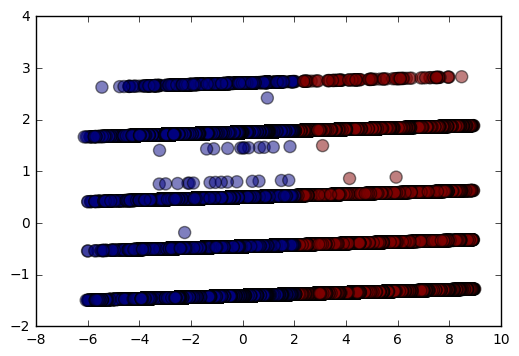

In [71]:
plt.scatter(x, y, c=labels, alpha=0.5, s=75)
plt.show()

In [78]:
KMSimulator.predict([[10, 3, 3]])

array([1])